Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Mohamed Abdelaziz | 12137202 | 13.05.2022, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI II</h1>
<h2 style="color:rgb(0,120,170)">Unit 3 &ndash; Drug Discovery (Assignment)</h2>

<b>Authors:</b> B. Schäfl, S. Lehner, J. Schimunek, J. Brandstetter, E. Kobler<br>
<b>Date:</b> 04-04-2022

This file is part of the "Hands-on AI II" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u3_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u3_utils.py</code> need to be installed.

In [1]:
# Import pre-defined utilities specific to this notebook.
import u3_utils as u3

# Import additional utilities needed in this notebook.
import numpy as np
import pandas as pd
import seaborn as sns

from copy import deepcopy
from rdkit import Chem

# Set default plotting style.
sns.set()

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u3.setup_jupyter()

# Check minimum versions.
u3.check_module_versions()

Installed Python version: 3.10 (✓)
Installed numpy version: 1.22.3 (✓)
Installed pandas version: 1.4.2 (✓)
Installed scikit-learn version: 1.0.2 (✓)
Installed matplotlib version: 3.5.1 (✓)
Installed seaborn version: 0.11.2 (✓)
Installed PIL version: 9.1.0 (✓)
Installed rdkit version: 2022.03.2 (✓)


<h2>Extracting Information of MOL/SDF Representations</h2>
<p>The first step of working with molecule data is actually getting them into memory. <tt>RDKit</tt> provides this functionality with <code>SDMolSupplier</code> – be aware that the specified file is <i>not</i> loaded at once, but piece by piece, depending on what information is retrieved. This behavior is solely for performance reasons, hence you do not need to worry about this besides <i>not</i> deleting/moving the specified data file during the whole process.</p>

<div class="alert alert-warning">
    <b>Exercise 1.1. [15 Points]</b>
    <ul>
        <li>Load the <i>molecule</i> data set <tt>molecules.sdf</tt> using the appropriate function as supplied by <tt>RDKit</tt>.</li>
        <li>To avoid any problems with the <i>lazy</i> loading mechanics of <tt>RDKit</tt>, print the total amount of loaded molecules.</li>
        <li>Visualize the $12$ molecules with the <i>highest LogP</i> values in a <i>$3\times 4$ grid</i> including their <i>Formulas</i> as well as their <i>LogP</i> values.</li>
        <li>What does the acronym <i>LogP</i> stand for? Which property do the extracted molecules share? Cite your sources (find an appropriate source, even if you know it by heart).</li>
    </ul>
</div>

218 molecules loaded from file.


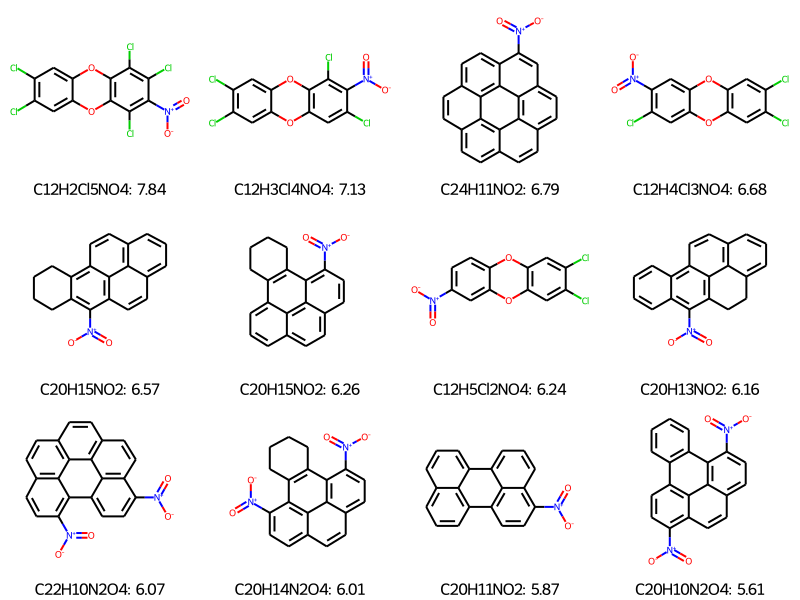

In [2]:
import collections

# Load Dataset
data_molecules = Chem.SDMolSupplier('resources/molecules.sdf')
num_molecules = len(data_molecules)
print(f'{num_molecules} molecules loaded from file.')

# Get Highest Logp Molecules + Labels
logp_mols = {float(data_molecules[k].GetProp('LogP')): k for k,v in enumerate(data_molecules)}.items()
sorted_logp_mols = list(collections.OrderedDict(sorted(logp_mols, reverse=True)).values())
max_logp_mols = [data_molecules[i] for i in sorted_logp_mols[:12]]
max_logp_mols_labels = [f'{i.GetProp("Formula")}: {i.GetProp("LogP")}' for i in max_logp_mols]

# Visualize Molecules
Chem.Draw.MolsToGridImage(max_logp_mols, legends=max_logp_mols_labels,
                            maxMols=len(max_logp_mols), molsPerRow=4)

# LogP is the principal parameters for the estimation of lipophilicity of chemical compounds and determines their
# pharmacokinetic properties, and is widely used in computational drug discovery by checking the differential solubility
# of a certain compound between two solvents "e.g. Water/Octanol", simply put, the ratio between "Unionized compound concentraion"
# to "its concentration in another solvent" at an equilibrium phase "no more reactions happening".
# In other words how hydrophilic (“water loving”) or hydrophobic (“water fearing”) a certain compound is,
# The Higher the ratio, the less solvable the compound is, thus it's preferred to be localized in more hydrophobic organisms
# and vice versa, and that plays an important role in the drug distribution inside the body.
# Source:
# https://cmst.eu/wp-content/uploads/files/10.12921_cmst.2012.18.02.81-88_Kujawski.pdf


# The Molecules Share the Solvency Property with respect to 2 solvents, and how would they react in a certain medium "solvent"

<div class="alert alert-warning">
    <b>Exercise 1.2. [10 Points]</b>
    <ul>
        <li>For each of the previously found molecules, <i>annote</i> each atom by its degree and compute each molecule's <i>atom count</i>.</li>
        <li>Visualize the result in a <i> $3\times 4$ grid</i> including their <i>Formulas</i> as well as their <i>atom counts</i> (sorted (ascending) according to <i>atom count</i>).</li>
        <li>Do you observe <i>visually similar</i> molecules? In either case, comment on their respective differences.</li>
    </ul>
</div>

In [3]:
def annotate_molecule_atoms(molecule: Chem.rdchem.Mol) -> Chem.rdchem.Mol:
    """
    Annotate molecule atoms with corresponding atom numbers.
    
    :param molecule: molecule to annotate
    :return: annotated molecule
    """
    molecule_annotated = deepcopy(molecule)
    for atom in molecule_annotated.GetAtoms():
#         Changed GetIdx to GetDegree
        atom.SetProp('atomNote', str(atom.GetDegree()))
    return molecule_annotated

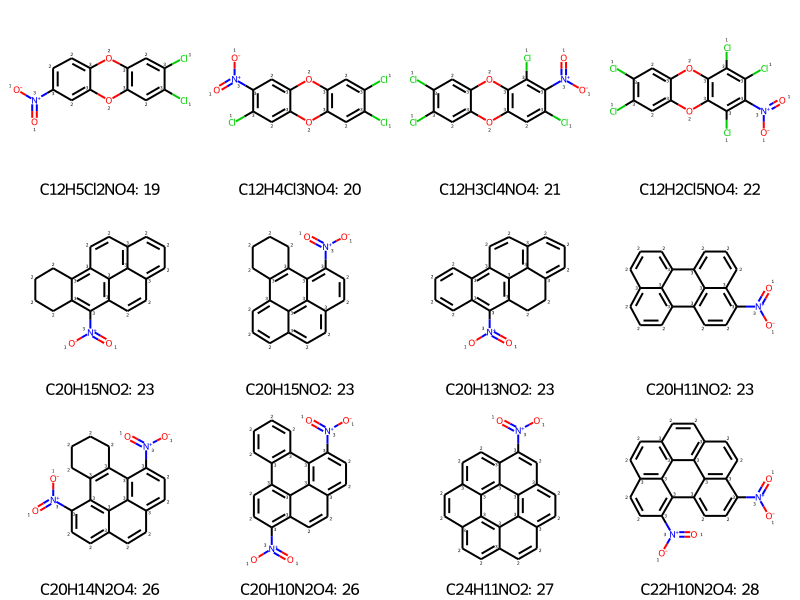

In [4]:
annotated_mols = [annotate_molecule_atoms(i) for i in max_logp_mols]
atom_counts = [i.GetNumAtoms() for i in annotated_mols]

# Sort Based on AtomNumber
sorted_annotated = sorted([(atom_counts[i], annotated_mols[i]) for i in range(len(atom_counts))], key=lambda i: i[0])
atom_counts = [i[0] for i in sorted_annotated]
annotated_mols = [i[1] for i in sorted_annotated]

annotated_mols_labels = [f'{annotated_mols[i].GetProp("Formula")}: {atom_counts[i]}' for i in range(len(annotated_mols))]
Chem.Draw.MolsToGridImage(annotated_mols, legends=annotated_mols_labels,
                            maxMols=len(annotated_mols), molsPerRow=4)

# Molecules with [19-22] Atoms are similar to each other:
#     - Consists of 3 rings, while the middle is connected to 2 Oxygen Atoms,
#     - The last ring is connected to at least 1 chlorine Atom,
#     - All Molecules has exactly 1 NO4 Structure,
#     - And they All Comprise of 12 Carbon Atoms"
# Molecules with 23, 26 Atoms are similar to each other:
#     - They all comprise of 5 Rings and 20 Carbon Atoms, with no chlorine atoms at all, and at least 1 NO2 Structure each"
# Molecules > 26 Atoms:
#     - Seems Visually Similar to each other
    
# We can Conclude that there "might" exist similarities between molecules clusters of similar number of atoms,
#     between the highest logp molecules, but not a single dominant visual similarities between all of them.

<h2>Atomic Properties and Bonds</h2>
<p>Extracting <i>atomic</i> as well as <i>bond</i> properties often allows for a more thorough undertstanding of the molecules at hand. Unsurprisingly, <tt>RDKit</tt> provides the necessary functionality for this purpose – almost. The missing functionality may be taken from the exercise notebook, but needs to be adapted accordingly.</p>

<div class="alert alert-warning">
    <b>Exercise 2.1. [10 Points]</b>
    <ul>
        <li>Compute the <i>amount of atoms not</i> participating in a <i>ring structure</i> for each of the molecules of the previous exercise.</li>
        <li>Adapt and apply <code>annotate_molecule_atoms</code> in a way to <i>only</i> mark atoms <i>not participating</i> in a ring structure with an <tt>N</tt>.</li>
        <li>Visualize the result in a <i> $3\times 4$ grid</i> including their <i>Formulas</i> as well as their <i>amount of non-ring atoms</i> (sorted (descending) according to the latter).</li>
    </ul>
</div>

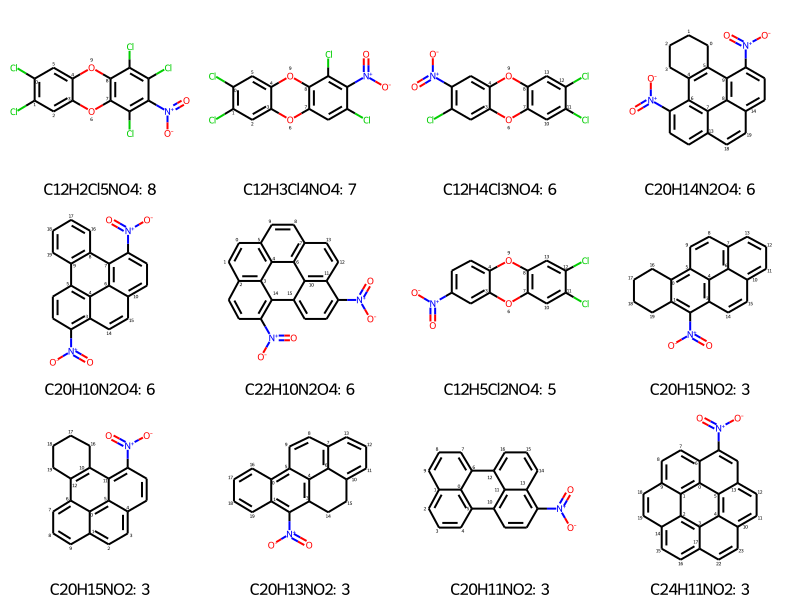

In [5]:
non_ring_atoms = [sum([1 for atom in mol.GetAtoms() if not atom.IsInRing()]) for mol in annotated_mols]

def annotate_molecule_atoms(molecule: Chem.rdchem.Mol) -> Chem.rdchem.Mol:
    """
    Annotate molecule atoms with corresponding atom numbers.
    
    :param molecule: molecule to annotate
    :return: annotated molecule
    """
    molecule_annotated = deepcopy(molecule)
    rings = molecule_annotated.GetRingInfo().AtomRings()
    to_annotate = []
    for ring in rings:
        included = False
        for a in ring:
            atom = molecule_annotated.GetAtomWithIdx(a)
            if 'N' in [i.GetSymbol() for i in atom.GetNeighbors()]:
                included = True
                break
        if not included:
            for a in ring:
                to_annotate.append(a)
    for atom in molecule_annotated.GetAtoms():
        if atom.GetIdx() in to_annotate:
            atom.SetProp('atomNote', str(atom.GetIdx()))
        else:
            atom.SetProp('atomNote', '')

    return molecule_annotated

annotated_mols = [annotate_molecule_atoms(molecule) for molecule in annotated_mols]

sorted_annotated = sorted([(non_ring_atoms[i], annotated_mols[i]) for i in range(len(non_ring_atoms))], key=lambda i: i[0],
                          reverse=True)
non_ring_atoms = [i[0] for i in sorted_annotated]
annotated_mols = [i[1] for i in sorted_annotated]


annotated_mols_labels = [f'{annotated_mols[i].GetProp("Formula")}: {non_ring_atoms[i]}' for i in range(len(annotated_mols))]

Chem.Draw.MolsToGridImage(annotated_mols, legends=annotated_mols_labels,
                            maxMols=len(annotated_mols), molsPerRow=4)

<div class="alert alert-warning">
    <b>Exercise 2.2. [10 Points]</b>
    <ul>
        <li>Compute the <i>amount of single-type bonds</i> for each of the molecules of the previous exercise.</li>
        <li>Adapt and apply <code>annotate_molecule_bonds</code> in a way to mark bonds with the <i>first letter</i> of their respective <i>type</i>.</li>
        <li>Visualize the result in a <i> $3\times 4$ grid</i> including their <i>Formulas</i> as well as their <i>amount of single bonds</i> (sorted (ascending) according to the latter).</li>
    </ul>
</div>

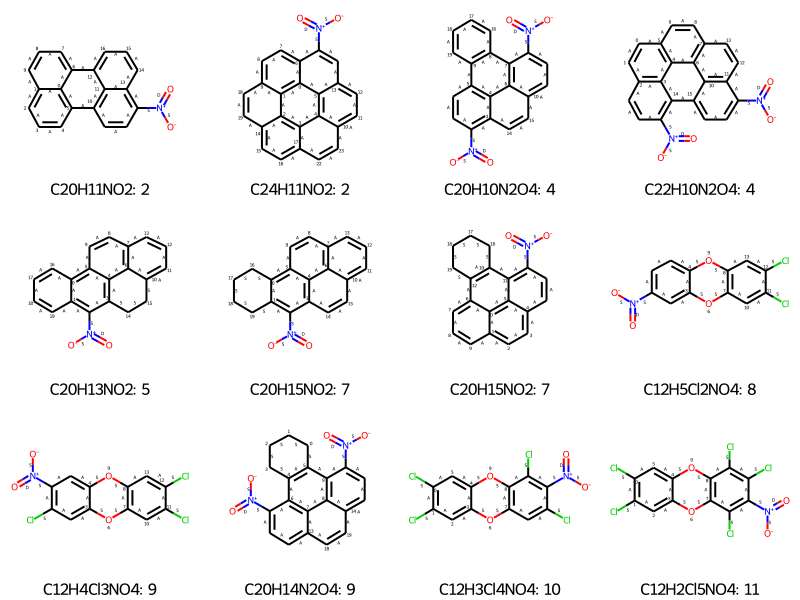

In [6]:
single_bonded_mols = [sum([1 for bond in mol.GetBonds() if bond.GetBondTypeAsDouble() == 1.0]) for mol in annotated_mols]

def annotate_molecule_bonds(molecule: Chem.rdchem.Mol) -> Chem.rdchem.Mol:
    """
    Annotate molecule bonds with corresponding bond numbers.
    
    :param molecule: molecule to annotate
    :return: annotated molecule
    """
    molecule_annotated = deepcopy(molecule)
    for bond in molecule_annotated.GetBonds():
        bond.SetProp('bondNote', str(bond.GetBondType())[0])
    return molecule_annotated

annotated_mols = [annotate_molecule_bonds(molecule) for molecule in annotated_mols]

sorted_annotated = sorted([(single_bonded_mols[i], annotated_mols[i]) for i in range(len(single_bonded_mols))], key=lambda i: i[0])
single_bonded_mols = [i[0] for i in sorted_annotated]
annotated_mols = [i[1] for i in sorted_annotated]

annotated_mols_labels = [f'{annotated_mols[i].GetProp("Formula")}: {single_bonded_mols[i]}' for i in range(len(annotated_mols))]

Chem.Draw.MolsToGridImage(annotated_mols, legends=annotated_mols_labels,
                            maxMols=len(annotated_mols), molsPerRow=4)

<h2>Further Applications</h2>
<p>In the following exercises, you'll have to dig into the more interesting applications of chemoinformatics, namely:
<ul>
    <li>molecular substructure matching</li>
    <li>molecular fingerprints</li>
    <li>molecular clustering</li>
</ul></p>

<div class="alert alert-warning">
    <b>Exercise 3.1. [10 Points]</b>
    <ul>
        <li>Specify a <tt>CCO</tt> template and scan the full molecules data set. Visualize the template including a respective <i>atom numbering</i>.</li>
        <li>For each of the found molecules, <i>annote</i> their atoms and compute their respective <i>substructure matches</i> (w.r.t. <tt>CCO</tt>).</li>
        <li>Visualize the result in a <i>grid</i> including their <i>substructure matches</i>. Can you recognize the substructures in the plot?</li>
    </ul>
</div>

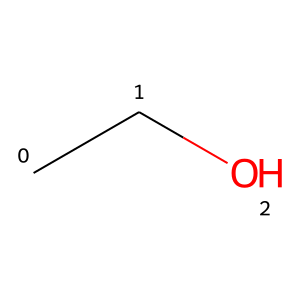

In [7]:
def annotate_molecule_atoms(molecule: Chem.rdchem.Mol) -> Chem.rdchem.Mol:
    """
    Annotate molecule atoms with corresponding atom numbers.
    
    :param molecule: molecule to annotate
    :return: annotated molecule
    """
    molecule_annotated = deepcopy(molecule)
    for atom in molecule_annotated.GetAtoms():
        atom.SetProp('atomNote', str(atom.GetIdx()))
    return molecule_annotated


cco_molecule = Chem.MolFromSmiles('CCO')

Chem.Draw.MolToImage(annotate_molecule_atoms(cco_molecule))

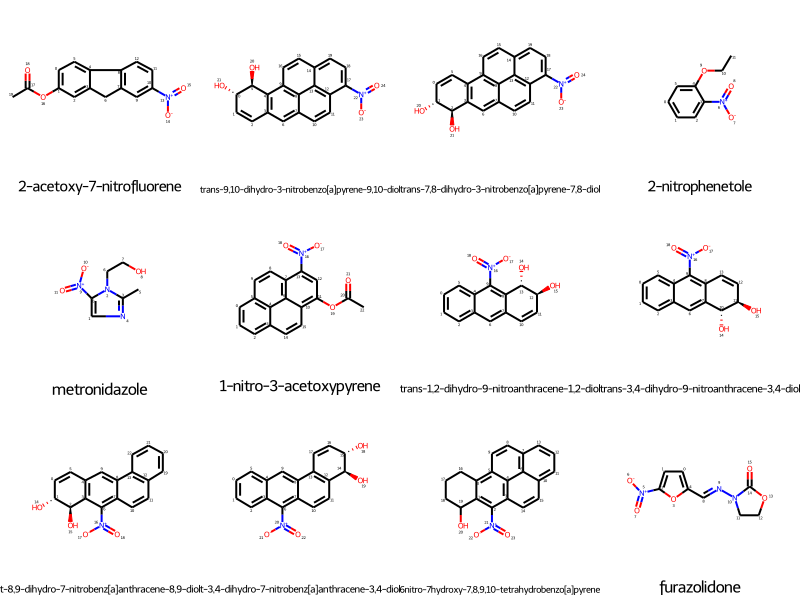

In [8]:
cco_molecules = [mol for mol in data_molecules if mol.HasSubstructMatch(cco_molecule)]
cco_molecules_annotated = [annotate_molecule_atoms(molecule) for molecule in cco_molecules]

cco_molecules_labels = [f'{mol.GetProp("Compound Name")}' for mol in cco_molecules_annotated]

Chem.Draw.MolsToGridImage(cco_molecules_annotated, legends=cco_molecules_labels, maxMols=len(cco_molecules_annotated), molsPerRow=4)

<div class="alert alert-warning">
    <b>Exercise 3.2. [20 Points]</b>
    <ul>
        <li>Compute the <i>ECFPs</i> from the previously found molecules and visualize them in tabular form (use a <i>fold size</i> of $256$).</li>
        <li>How many <i>substructures</i> are present in each molecule? Compute and sort their <i>total amount</i> for each molecule.</li>
    </ul>
</div>

In [15]:
cco_molecules_smiles = [Chem.MolToSmiles(molecule) for molecule in cco_molecules]
cco_molecules_ecfps = u3.compute_ecfps(cco_molecules_smiles, fold=256)

pd.DataFrame(cco_molecules_ecfps.sum(axis=1)).sort_values(by=[0]).transpose()

,3,4,11,7,0,6,5,10,2,8,9,1
0,29,34,40,43,45,45,46,51,52,52,52,56


<div class="alert alert-warning">
    <b>Exercise 3.3. [25 Points]</b>
    <ul>
        <li>Downproject the previously computed <i>ECFPs</i> using <i>PCA</i>. Visualize the result in a <i>scatter plot</i>. Are there any visible clusters?</li>
            <li>Cluster the resulting downprojections using <i>affinity propagation</i>. Why would <i>k-means</i> be a little bit disadvantageous here?</li>
        <li>Plot all molecules of all <i>clusters</i> in separate <i>grids</i> including their <i>Compound Name</i> and <i>LogP</i>. Do you see similarities?</li>
    </ul>
</div>

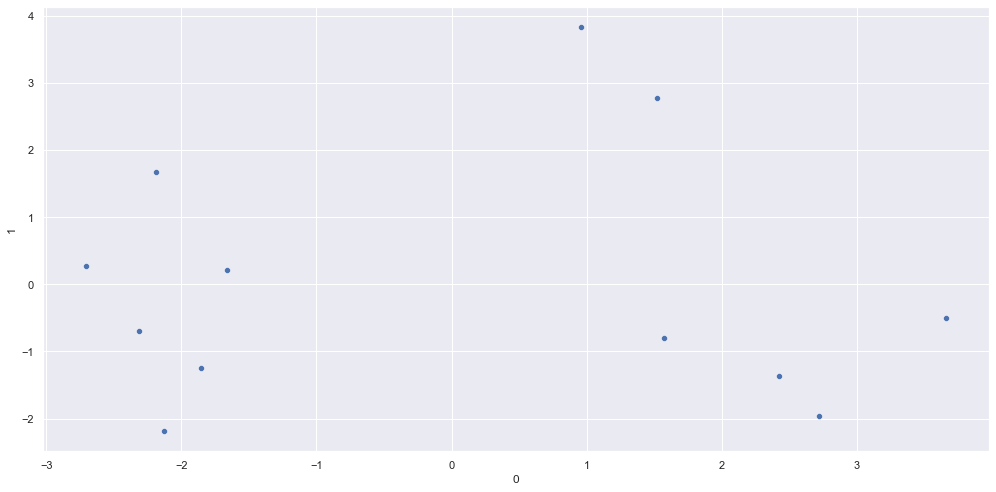

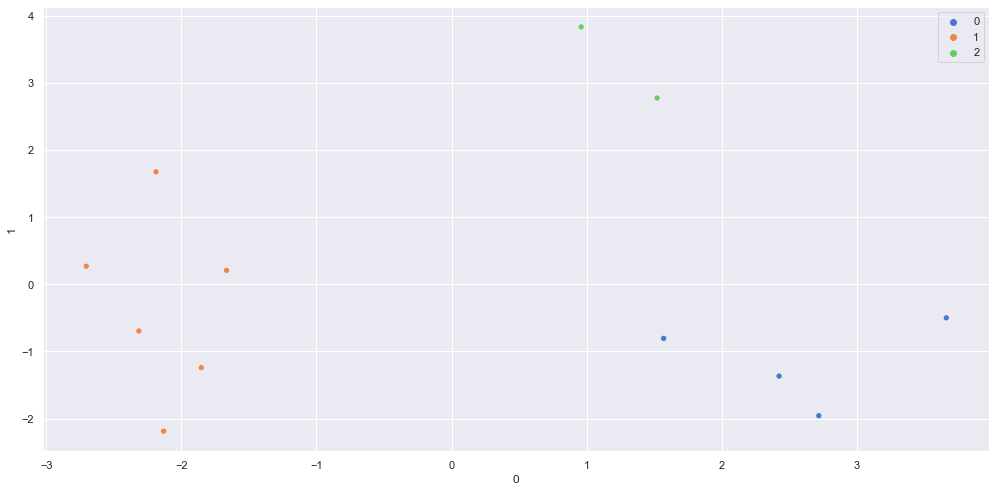

In [44]:
cco_ecfps_pca = u3.apply_pca(n_components=2, data=cco_molecules_ecfps)
u3.plot_points_2d(data=cco_ecfps_pca, figsize=(14, 7))

cco_ecfps_pca_aff_prop = u3.apply_affinity_propagation(data=cco_ecfps_pca)
# K-Means assume we know an estimated number of clusters present in the data, which is not the case with out data.
# Affinity Propagation on the other hand doesn't need the number of clusters.
u3.plot_points_2d(data=cco_ecfps_pca, targets=cco_ecfps_pca_aff_prop, figsize=(14, 7))
# Found 3 Clusters [0, 1, 2]

In [ ]:
# for i in range(3):
#     cco_cluster_is = cco_ecfps_pca[cco_ecfps_pca_aff_prop == i].index
#     cco_cluster_mols = [data_molecules[i] for i in cco_cluster_is]
#     cco_cluster_labels = [f'{mol.GetProp("Compound Name")}: {mol.GetProp("LogP")}' for mol in cco_cluster_mols]
#     Chem.Draw.MolsToGridImage(cco_cluster_mols, legends=cco_cluster_labels, maxMols=len(cco_cluster_mols))

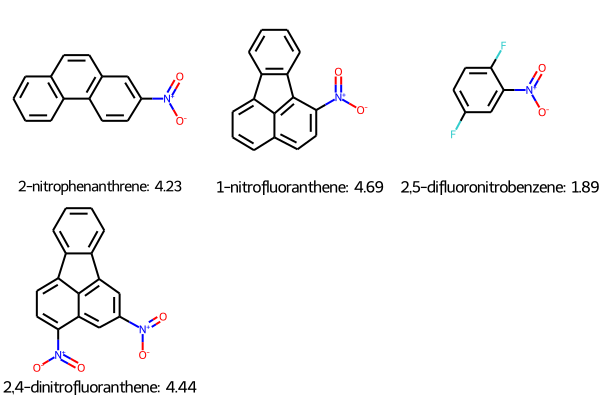

In [42]:
cco_cluster_is = cco_ecfps_pca[cco_ecfps_pca_aff_prop == 0].index
cco_cluster_mols = [data_molecules[i] for i in cco_cluster_is]
cco_cluster_labels = [f'{mol.GetProp("Compound Name")}: {mol.GetProp("LogP")}' for mol in cco_cluster_mols]
Chem.Draw.MolsToGridImage(cco_cluster_mols, legends=cco_cluster_labels, maxMols=len(cco_cluster_mols))

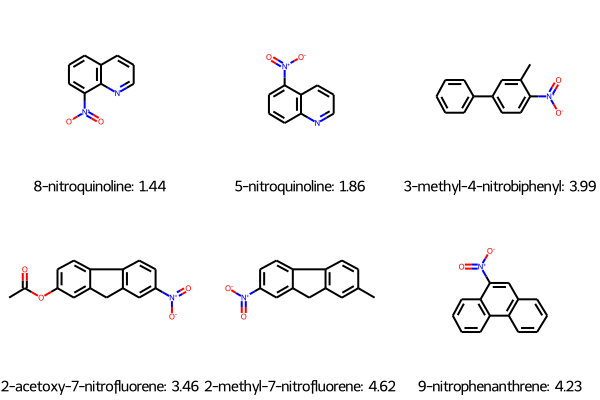

In [41]:
cco_cluster_is = cco_ecfps_pca[cco_ecfps_pca_aff_prop == 1].index
cco_cluster_mols = [data_molecules[i] for i in cco_cluster_is]
cco_cluster_labels = [f'{mol.GetProp("Compound Name")}: {mol.GetProp("LogP")}' for mol in cco_cluster_mols]
Chem.Draw.MolsToGridImage(cco_cluster_mols, legends=cco_cluster_labels, maxMols=len(cco_cluster_mols))

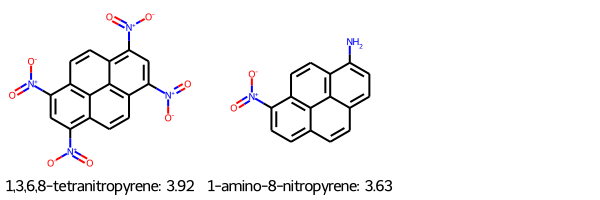

In [43]:
cco_cluster_is = cco_ecfps_pca[cco_ecfps_pca_aff_prop == 2].index
cco_cluster_mols = [data_molecules[i] for i in cco_cluster_is]
cco_cluster_labels = [f'{mol.GetProp("Compound Name")}: {mol.GetProp("LogP")}' for mol in cco_cluster_mols]
Chem.Draw.MolsToGridImage(cco_cluster_mols, legends=cco_cluster_labels, maxMols=len(cco_cluster_mols))